# 1) Data Acqusition

In [1]:
#!/bin/bash
!kaggle datasets download quora/question-pairs-dataset

Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
 43% 9.00M/20.8M [00:00<00:00, 74.5MB/s]
100% 20.8M/20.8M [00:00<00:00, 121MB/s] 


In [2]:
!unzip question-pairs-dataset.zip

Archive:  question-pairs-dataset.zip
  inflating: questions.csv           


In [3]:
!rm -rf question-pairs-dataset.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('questions.csv')

# 2) Data Inspection

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404351, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

0

## 3) Data Analysis

In [12]:
df.is_duplicate.value_counts()

,count
is_duplicate,
0,255042
1,149306


In [19]:
(df.is_duplicate.value_counts()/df.shape[0]*100).rename('Percent', axis = 'index', inplace = True)

,Percent
is_duplicate,
0,63.074876
1,36.925124


<ipython-input-40-58195d8dc47f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_duplicate', data=df, palette='pastel')


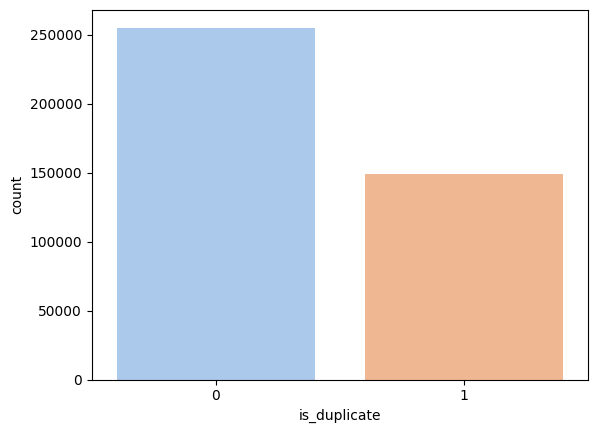

In [40]:
sns.countplot(x='is_duplicate', data=df, palette='pastel')
plt.savefig('countplot.png')
plt.show()

In [29]:
all_questions = pd.concat([df['question1'], df['question2']])

unq_q = all_questions.nunique()
rep_q = len(all_questions) - unq_q

print(f"Total number of questions: {len(all_questions)}")
print(f"Number of unique questions: {unq_q}")
print(f"Number of repeated questions: {rep_q}")

Total number of questions: 808696
Number of unique questions: 537386
Number of repeated questions: 271310


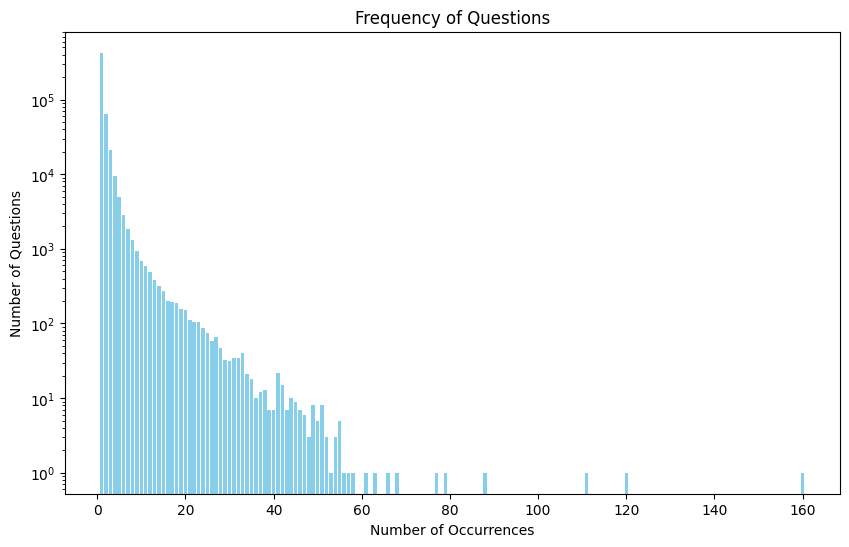

In [41]:
question_counts = all_questions.value_counts()

# Create a histogram of the question frequencies
plt.figure(figsize=(10, 6))
plt.hist(question_counts, bins=160, align='left', rwidth=0.8, color = 'skyblue')
plt.yscale('log')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Questions')
plt.title('Frequency of Questions')

plt.savefig('frequency_plot.png')
plt.show()

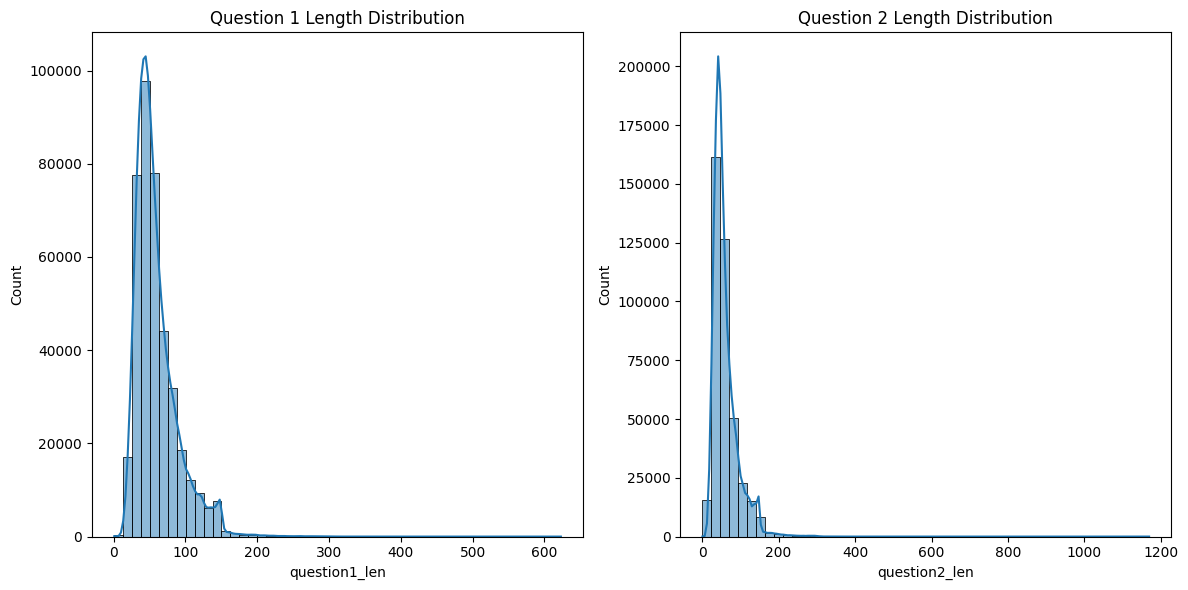

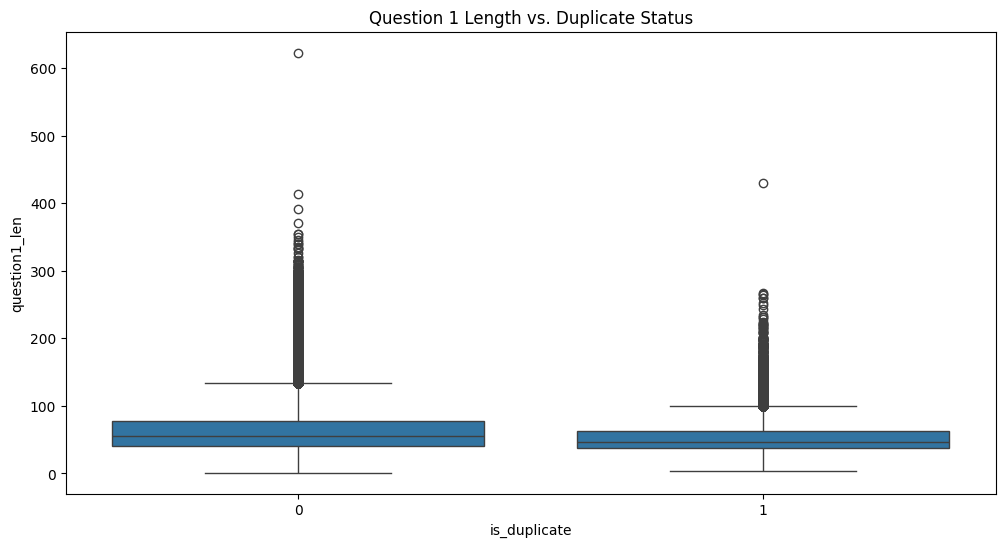

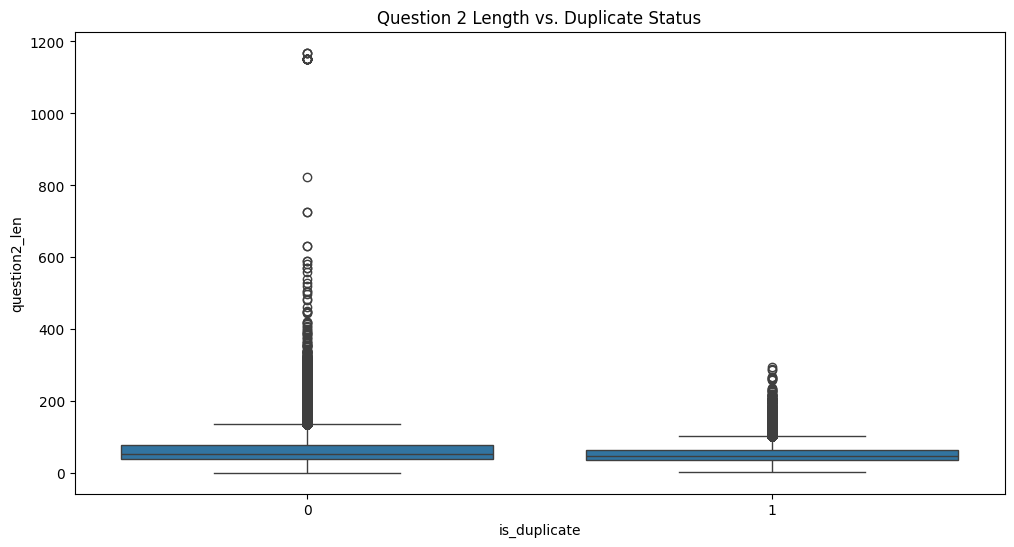

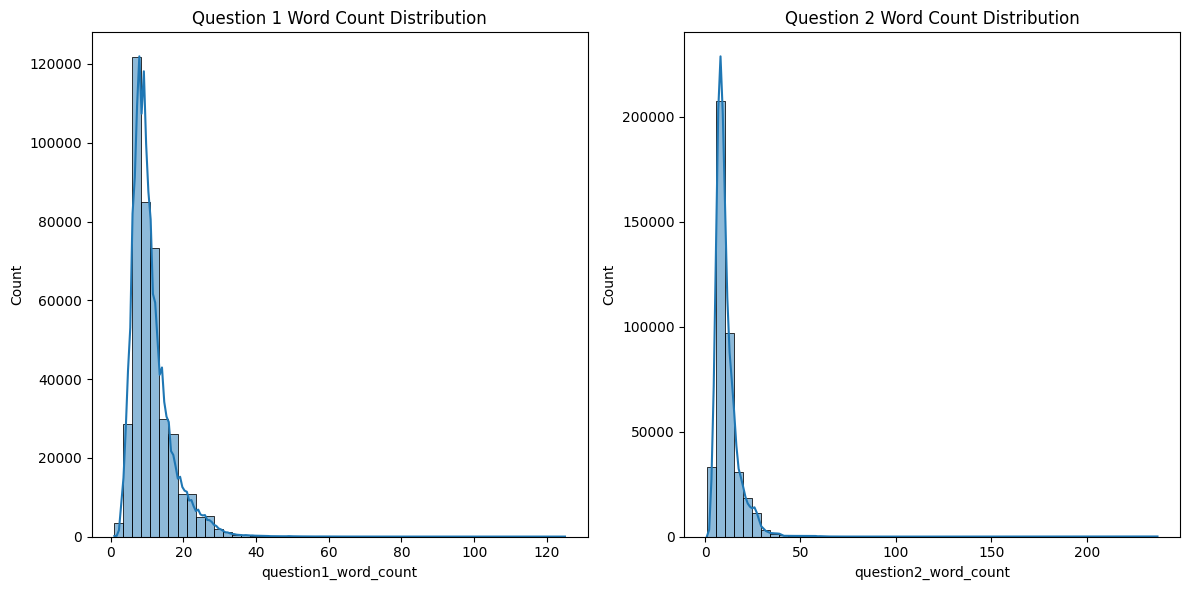

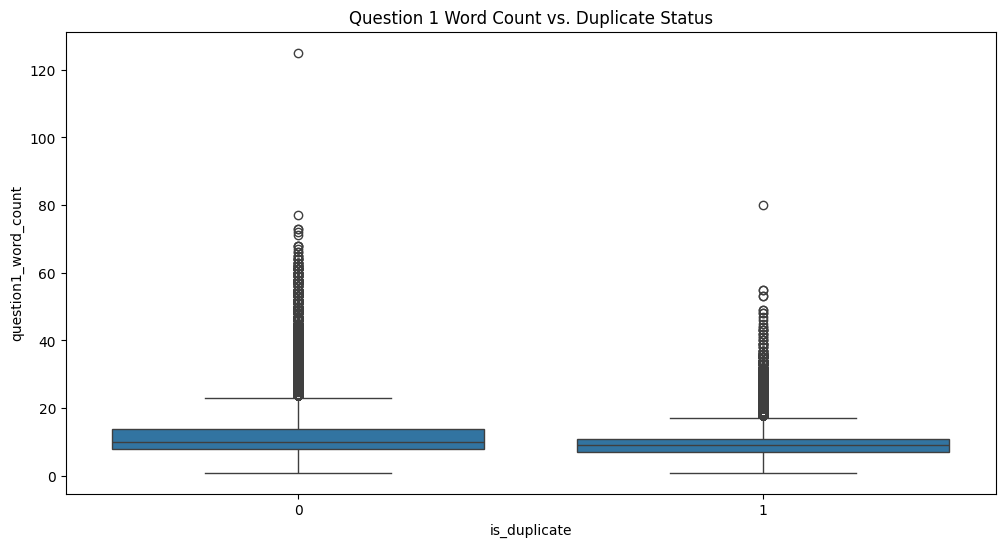

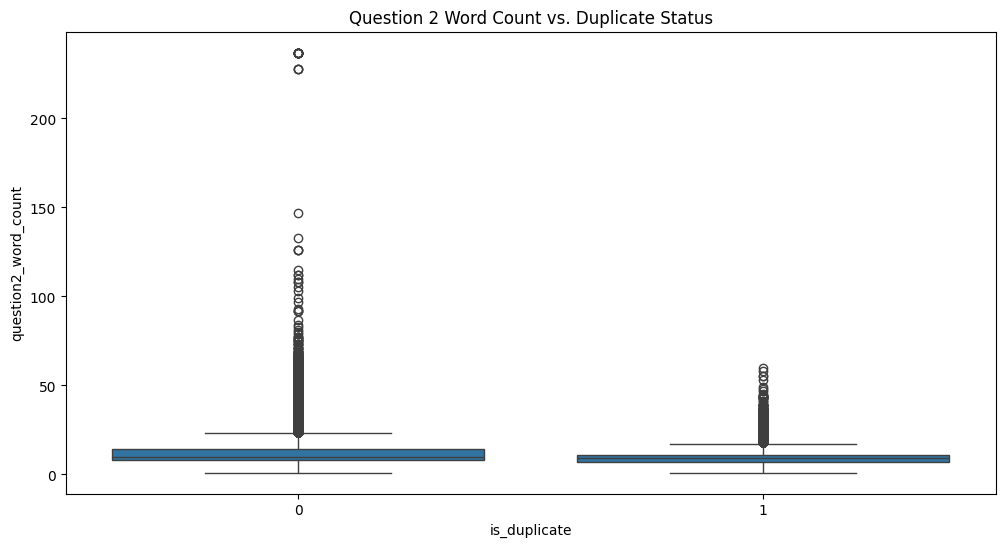

In [42]:
# Analyze question lengths
df['question1_len'] = df['question1'].str.len()
df['question2_len'] = df['question2'].str.len()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['question1_len'], bins=50, kde=True)
plt.title('Question 1 Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['question2_len'], bins=50, kde=True)
plt.title('Question 2 Length Distribution')

plt.tight_layout()
plt.savefig('question_length_distribution.png')
plt.show()

# Analyze the relationship between question length and duplicate status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_duplicate', y='question1_len', data=df)
plt.title('Question 1 Length vs. Duplicate Status')
plt.savefig('question1_length_vs_duplicate.png')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='is_duplicate', y='question2_len', data=df)
plt.title('Question 2 Length vs. Duplicate Status')
plt.savefig('question2_length_vs_duplicate.png')
plt.show()

# Analyze the number of words in questions
df['question1_word_count'] = df['question1'].apply(lambda x: len(str(x).split()))
df['question2_word_count'] = df['question2'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['question1_word_count'], bins=50, kde=True)
plt.title('Question 1 Word Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['question2_word_count'], bins=50, kde=True)
plt.title('Question 2 Word Count Distribution')

plt.tight_layout()
plt.savefig('question_word_count_distribution.png')
plt.show()


# Analyze the relationship between word count and duplicate status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_duplicate', y='question1_word_count', data=df)
plt.title('Question 1 Word Count vs. Duplicate Status')
plt.savefig('question1_word_count_vs_duplicate.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='is_duplicate', y='question2_word_count', data=df)
plt.title('Question 2 Word Count vs. Duplicate Status')
plt.savefig('question2_word_count_vs_duplicate.png')
plt.show()

In [43]:
!zip -r EDA_results.zip *.png

  adding: countplot.png (deflated 26%)
  adding: frequency_plot.png (deflated 24%)
  adding: question1_length_vs_duplicate.png (deflated 23%)
  adding: question1_word_count_vs_duplicate.png (deflated 22%)
  adding: question2_length_vs_duplicate.png (deflated 23%)
  adding: question2_word_count_vs_duplicate.png (deflated 23%)
  adding: question_length_distribution.png (deflated 12%)
  adding: question_word_count_distribution.png (deflated 13%)
